# Team 4 - TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The `ratings` column is in dictionary format. How should we handle them?
- Same for `related_talks` and `tags` column
- Can you find the `year` of the talks?
- And more...

In [ ]:
# Link to Tableau Dashboard:
"https://public.tableau.com/profile/khacquy#!/vizhome/DinhKhacQuy_week4_assignment/TedInsights?publish=yes"

In [ ]:
# Start your codes here!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

In [2]:
df_ted = pd.read_csv("ted.csv")
df_ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
# Data wrangling

In [4]:
#there is no duplicates
df_ted.duplicated().values.any()

False

In [5]:
#there are null values needing to be processed
df_ted.isnull().values.any()

True

In [6]:
#select null by rows
len(df_ted[df_ted.isnull().any(axis=1)])

6

In [7]:
#fill null values
df_ted['speaker_occupation'] = df_ted['speaker_occupation'].fillna("unknown")

In [8]:
#there is no more null values
df_ted.isnull().values.any()

False

In [9]:
#prove that cannot based on event to extract year
df_ted[df_ted["event"].apply(lambda x : not any(map(str.isdigit, x)))]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
306,33,An ancient disease is taking on a deadly new f...,352,TED Prize Wish,1222992000,27,James Nachtwey,James Nachtwey: Moving photos of extreme drug-...,1,1222995600,"[{'id': 8, 'name': 'Informative', 'count': 102...","[{'id': 84, 'hero': 'https://pe.tedcdn.com/ima...",Photojournalist,"['TED Prize', 'art', 'communication', 'design'...",Moving photos of extreme drug-resistant TB,https://www.ted.com/talks/james_nachtwey_fight...,421212
324,99,Swami Dayananda Saraswati unravels the paralle...,1014,Chautauqua Institution,1254355200,38,Dayananda Saraswati,Dayananda Saraswati: The profound journey of c...,1,1225428060,"[{'id': 10, 'name': 'Inspiring', 'count': 369}...","[{'id': 675, 'hero': 'https://pe.tedcdn.com/im...",Vedantic teacher,"['charter for compassion', 'compassion', 'glob...",The profound journey of compassion,https://www.ted.com/talks/swami_dayananda_sara...,273396
325,30,Join Rev. James Forbes at the dinner table of ...,1118,Chautauqua Institution,1254355200,20,James Forbes,James Forbes: Compassion at the dinner table,1,1225428300,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 674, 'hero': 'https://pe.tedcdn.com/im...",Preacher,"['charter for compassion', 'compassion', 'fait...",Compassion at the dinner table,https://www.ted.com/talks/james_forbes\n,204410
327,46,It's hard to always show compassion -- even to...,1087,Chautauqua Institution,1254355200,27,Robert Thurman,Robert Thurman: Expanding your circle of compa...,1,1225429080,"[{'id': 10, 'name': 'Inspiring', 'count': 148}...","[{'id': 674, 'hero': 'https://pe.tedcdn.com/im...",Buddhist scholar,"['charter for compassion', 'compassion', 'glob...",Expanding your circle of compassion,https://www.ted.com/talks/robert_thurman_on_co...,304800
358,116,TED follows Nicholas Negroponte to Colombia as...,408,TED in the Field,1228348800,30,Nicholas Negroponte,Nicholas Negroponte: Taking OLPC to Colombia,1,1229959020,"[{'id': 10, 'name': 'Inspiring', 'count': 246}...","[{'id': 41, 'hero': 'https://pe.tedcdn.com/ima...",Tech visionary,"['children', 'computers', 'design', 'global is...",Taking OLPC to Colombia,https://www.ted.com/talks/nicholas_negroponte_...,363202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,21,Can you still be friends with someone who does...,865,TEDxMileHigh,1499472000,5,Caitlin Quattromani and Lauran Arledge,Caitlin Quattromani and Lauran Arledge: How ou...,2,1505142060,"[{'id': 3, 'name': 'Courageous', 'count': 45},...","[{'id': 2625, 'hero': 'https://pe.tedcdn.com/i...",Marketing leader,"['TEDx', 'communication', 'friendship', 'polit...",How our friendship survives our opposing politics,https://www.ted.com/talks/caitlin_quattromani_...,566101
2538,7,"Each year, one in seven large corporations com...",808,TEDxZurich,1478822400,1,Alexander Wagner,Alexander Wagner: What really motivates people...,1,1505246451,"[{'id': 10, 'name': 'Inspiring', 'count': 50},...","[{'id': 1246, 'hero': 'https://pe.tedcdn.com/i...",Economist,"['TEDx', 'business', 'corruption', 'economics'...",What really motivates people to be honest in b...,https://www.ted.com/talks/alexander_wagner_wha...,621431
2540,33,We've heard a lot of rhetoric lately suggestin...,722,TED@UPS,1500508800,4,Augie Picado,Augie Picado: The real reason manufacturing jo...,1,1505400604,"[{'id': 1, 'name': 'Beautiful', 'count': 15}, ...","[{'id': 2655, 'hero': 'https://pe.tedcdn.com/i...",Border specialist,"['business', 'capitalism', 'collaboration', 'e...",The real reason manufacturing jobs are disappe...,https://www.ted.com/talks/augie_picado_the_rea...,613915
2541,12,Physics doesn't just happen in a fancy lab -- ...,957,TEDxManchester,1487462400,2,Helen Czerski,Helen Czerski: The fascinating physics of ever...,1,1505419202,"[{'id': 11, 'name': 'Longwinded', 'count': 29}...","[{'id': 2491, 'hero': 'http

In [10]:
#use published_date to find out the year when a tedTalk is published

In [11]:
df_ted['published_date_format'] = pd.to_datetime(df_ted['published_date'], unit='s', errors='coerce').dt.strftime('%d-%m-%Y')

In [12]:
df_ted['film_date_format'] = pd.to_datetime(df_ted['film_date'], unit='s', errors='coerce').dt.strftime('%d-%m-%Y')

In [13]:
df_ted['year_published'] = pd.to_datetime(df_ted['published_date'], unit='s', errors='coerce').dt.year

In [14]:
df_ted[['published_date_format', 'film_date_format', 'year_published']]

,published_date_format,film_date_format,year_published
0,27-06-2006,25-02-2006,2006
1,27-06-2006,25-02-2006,2006
2,27-06-2006,24-02-2006,2006
3,27-06-2006,26-02-2006,2006
4,27-06-2006,22-02-2006,2006
...,...,...,...
2545,19-09-2017,06-06-2017,2017
2546,20-09-2017,24-04-2017,2017
2547,21-09-2017,24-04-2017,2017
2548,21-09-2017,08-07-2017,2017


In [15]:
# len(df_ted['year_published'].unique())

In [16]:
#To visualize published_year and views
df_yv = df_ted.groupby(['year_published'])['views'].sum().reset_index()
df_yv.head()

,year_published,views
0,2006,206548331
1,2007,176455861
2,2008,260270993
3,2009,342059615
4,2010,402694421


In [17]:
#To visualize published_year and comments
df_yc = df_ted.groupby(['year_published'])['comments'].sum().reset_index()
df_yc.head()

,year_published,comments
0,2006,18171
1,2007,25080
2,2008,27477
3,2009,44104
4,2010,80955


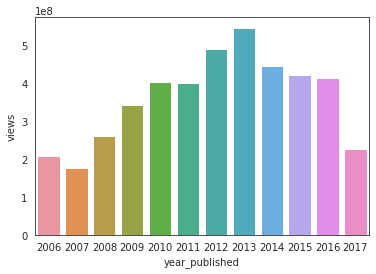

In [18]:
with sns.axes_style('white'):
    g = sns.barplot(x='year_published', y='views', data=df_yv)

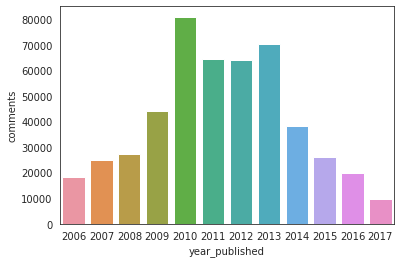

In [19]:
with sns.axes_style('white'):
    g = sns.barplot(x='year_published', y='comments', data=df_yc)

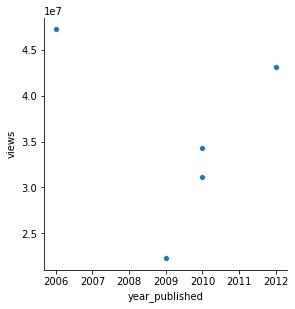

In [20]:
#2010 contains the most number of videos in top5 view_comments
df_top5vc = df_ted.nlargest(5, 'views')
sns.pairplot(df_top5vc, x_vars="year_published", y_vars="views", height=4);

In [21]:
df_top5vc[df_top5vc['year_published']==2010][['main_speaker', 'name', 'speaker_occupation', 'views']]

,main_speaker,name,speaker_occupation,views
677,Simon Sinek,Simon Sinek: How great leaders inspire action,Leadership expert,34309432
837,Brené Brown,Brené Brown: The power of vulnerability,Vulnerability researcher,31168150


In [32]:
#top 10 talks having most views
df_top10vc = df_ted.nlargest(10, 'views')
df_top10vc[['main_speaker', 'name', 'speaker_occupation', 'views']].reset_index()

,index,main_speaker,name,speaker_occupation,views
0,0,Ken Robinson,Ken Robinson: Do schools kill creativity?,Author/educator,47227110
1,1346,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,Social psychologist,43155405
2,677,Simon Sinek,Simon Sinek: How great leaders inspire action,Leadership expert,34309432
3,837,Brené Brown,Brené Brown: The power of vulnerability,Vulnerability researcher,31168150
4,452,Mary Roach,Mary Roach: 10 things you didn't know about or...,Writer,22270883
5,1776,Julian Treasure,Julian Treasure: How to speak so that people w...,Sound consultant,21594632
6,201,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,Neuroanatomist,21190883
7,5,Tony Robbins,Tony Robbins: Why we do what we do,Life coach; expert in leadership psychology,20685401
8,2114,James Veitch,James Veitch: This is what happens when you re...,Comedian and writer,20475972
9,1416,Cameron Russell,Cameron Russell: Looks aren't everything. Beli...,Model,19787465


In [33]:
#views_comments is a better benmark for users' interactions evaluation
df_ted['views_comments'] = df_ted['views'] + df_ted['comments']
df_ted[['views', 'comments', 'views_comments']].head()

,views,comments,views_comments
0,47227110,4553,47231663
1,3200520,265,3200785
2,1636292,124,1636416
3,1697550,200,1697750
4,12005869,593,12006462


In [34]:
#calculate duration in minutes
df_ted['duration_m'] = df_ted['duration']/60

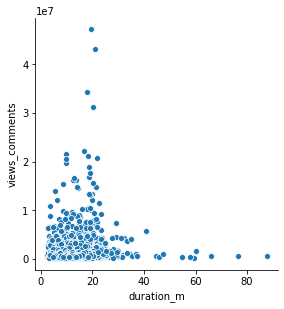

In [35]:
#videos should in (0,20') and recommend ~20'
sns.pairplot(df_ted, x_vars="duration_m", y_vars="views_comments", height=4);

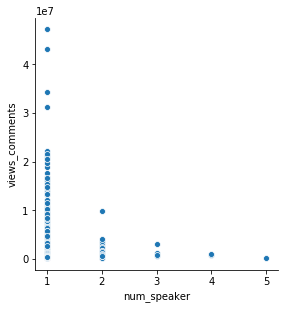

In [26]:
#videos should have 1 author only.
sns.pairplot(df_ted, x_vars="num_speaker", y_vars="views_comments", height=4);

In [27]:
#calculate the number of words of each title
df_ted['title_words'] = df_ted['title'].apply(lambda x : len(x.split()))

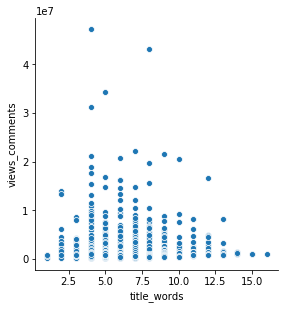

In [36]:
#videos' title contains 4-9 words.
sns.pairplot(df_ted, x_vars="title_words", y_vars="views_comments", height=4);

In [37]:
#top10 occupations/fields to which a video should belongs.

df_ov = df_ted.groupby(['speaker_occupation'])['views_comments'].sum().reset_index()
df_ov10 = df_ov.nlargest(10, 'views_comments')
df_o10 = df_ted[df_ted['speaker_occupation'].isin(df_ov10['speaker_occupation'])]

def get_top10_tags(val):
    dict_tags = defaultdict(int)
    ua_tags = []
    list_tags = val.split('; ') #'[1,2,3]; [4,5,6]' -> ['[1,2,3]', '[4,5,6]']
    for tag_str in list_tags:
        tags = tag_str[1:-1].split(', ') #ex. '[1,2,3]' -> [1,2,3]
        for tag in tags:
            dict_tags[tag] += 1 #(key,value) = (number, count)
    sorted_dict_tags = {k: v for k, v in sorted(dict_tags.items(), key=lambda item: item[1])} #sort dict by its values
    ua_tags = list(set(sorted_dict_tags.keys()))
    return ua_tags[:10] #top10 tags

df_o10tags = df_o10.groupby(['speaker_occupation'])[['tags']].agg(lambda x: "; ".join(x)).reset_index()
df_o10tags['tags'] = df_o10tags['tags'].apply(get_top10_tags)
df_o10tv = df_o10tags.merge(df_ov10, left_on='speaker_occupation', right_on='speaker_occupation', how='inner')
df_o10tv.sort_values("views_comments", ascending=False).reset_index()

,index,speaker_occupation,tags,views_comments
0,9,Writer,"['sexual violence', 'medicine', 'immigration',...",133562386
1,6,Psychologist,"['TEDYouth', 'empathy', 'social media', 'evil'...",90859035
2,0,Author/educator,"['disease', 'dance', 'creativity', 'invention'...",63013175
3,2,Entrepreneur,"['Bioethics', 'plastic', 'investment', 'play',...",61770904
4,7,Social psychologist,"['empathy', 'social media', 'choice', 'global ...",56818646
5,4,Leadership expert,"['military', 'entrepreneur', 'men', 'gender', ...",48206228
6,3,Journalist,"['investment', 'charter for compassion', 'medi...",47868615
7,1,Designer,"['biomimicry', 'play', 'farming', 'toy', 'inno...",43297716
8,5,Neuroscientist,"['Bioethics', 'medicine', 'innovation', 'physi...",40893921
9,8,Vulnerability researcher,"['mental health', 'communication', 'depression...",39159678


In [30]:
# For using Tableau
# df_ted.to_csv('ted_clean.csv', index=False)

In [31]:
# For using Tableau with join to ted_clean.csv above
# df_o10tv.to_csv('ted_o10tv.csv', index=False)